In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/bigb0ss/Retail-datasets/master/Online%20Retail.csv", encoding="latin1")
print(df.shape) 
print(df.tail())

print("\nColumns:", df.columns.tolist()) #.tolist() → Converts that Index object into a regular Python list. used to print the column names

(541909, 8)
       InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID Country  
541904  12/9/2011 12:50       0.85     12680.0  France  
541905  12/9/2011 12:50       2.10     12680.0  France  
541906  12/9/2011 12:50       4.15     12680.0  France  
541907  12/9/2011 12:50       4.15     12680.0  France  
541908  12/9/2011 12:50       4.95     12680.0  France  

Columns: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


##Finding the Top 10 Bestselling Products
In this section, we group the dataset by product description and calculate the total quantity sold for each product. We then sort these totals in descending order and select the top 10 products. Finally, we visualize the results using a bar chart to quickly identify the most popular items.

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLDER    35317
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26315
PACK OF 60 PINK PAISLEY CAKE CASES    24753
Name: Quantity, dtype: int64


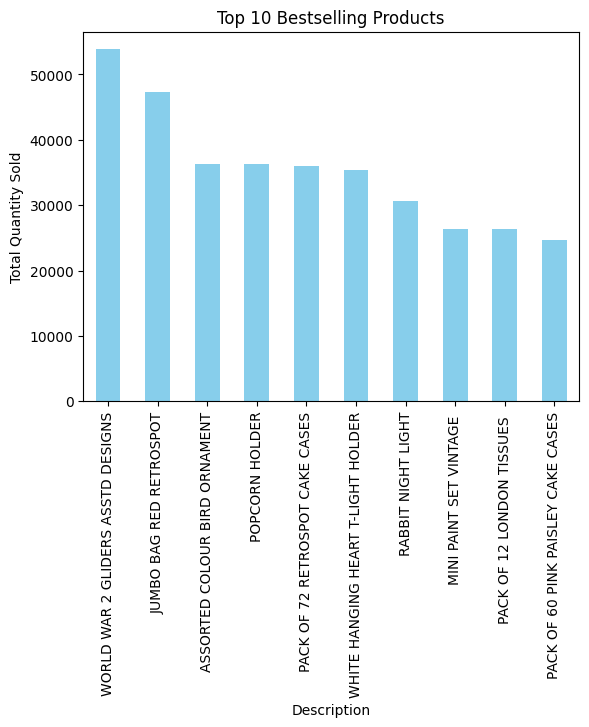

In [ ]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10) //means we are grouping the data by 'Description' and summing the 'Quantity' for each product, then sorting it in descending order and taking the top 10 products.
print(top_products)

import matplotlib.pyplot as plt

top_products.plot(kind='bar', color='skyblue') # Plotting the top 10 bestselling products
plt.title('Top 10 Bestselling Products')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=90) # Rotating x-axis labels for better readability
plt.show()

##Analyzing Monthly Sales Trends
In retail analytics, spotting seasonal sales patterns is crucial for inventory planning and marketing campaigns.
Here’s what we’ll do:
Convert the InvoiceDate column into proper datetime format.
Extract the month from each invoice.
Group the data by month and sum up the quantities sold.
Plot the results as a line chart to see which months perform best.

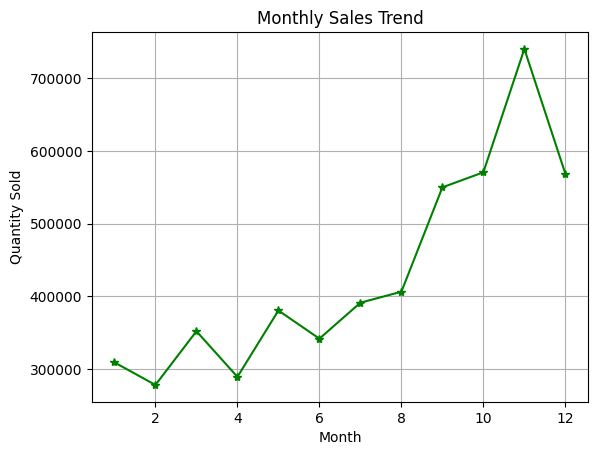

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) # Convert 'InvoiceDate' to datetime format
df['Month'] = df['InvoiceDate'].dt.month # Extracting month from 'InvoiceDate' for monthly sales analysis

monthly_sales = df.groupby('Month')['Quantity'].sum() # Summing up quantities sold per month

monthly_sales.plot(kind='line', marker='*', color='green') # Plotting the monthly sales trend
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.grid(True) # Adding grid for better readability
plt.show()

##Customer Segmentation with K-Means Clustering
Retailers often group customers based on their buying behavior so they can offer personalized deals and improve engagement.
In this example, we’ll:
Group customers by their CustomerID.
Calculate:
Number of purchases (InvoiceNo)
Total items bought (Quantity)
Use K-Means clustering to split customers into 3 groups (e.g., frequent buyers, occasional buyers, and one-time buyers).
Assign a cluster label to each customer.

In [ ]:
from sklearn.cluster import KMeans # means we are importing the KMeans class from the sklearn.cluster module, which is used for clustering analysis.
import numpy as np

# Prepare data
customer_data = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',  # Number of purchases
    'Quantity': 'sum'        # Total items bought
}).reset_index() # Renaming the columns for clarity

#print(customer_data)

X = customer_data[['InvoiceNo', 'Quantity']]

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42) #means we are creating an instance of the KMeans class with 3 clusters and a random state for reproducibility.random sate taken as 42 because to do reproducibility of the results. reproducibility means that if you run the code multiple times, you will get the same results each time.
customer_data['Cluster'] = kmeans.fit_predict(X) #means we are fitting the KMeans model to the data in X and predicting the cluster labels for each customer, which are then added to the customer_data DataFrame as a new column named 'Cluster'.

print(customer_data.head())
print(customer_data.tail())

cluster_1_customers = customer_data[customer_data['Cluster'] == 1] #means we are filtering the customer_data DataFrame to get only those customers who belong to cluster 1.
cluster_2_customers = customer_data[customer_data['Cluster'] == 2] #means we are filtering the customer_data DataFrame to get only those customers who belong to cluster 2.
print(cluster_1_customers)
print(cluster_2_customers)

   CustomerID  InvoiceNo  Quantity  Cluster
0     12346.0          2         0        0
1     12347.0          7      2458        0
2     12348.0          4      2341        0
3     12349.0          1       631        0
4     12350.0          1       197        0
      CustomerID  InvoiceNo  Quantity  Cluster
4367     18280.0          1        45        0
4368     18281.0          1        54        0
4369     18282.0          3        98        0
4370     18283.0         16      1397        0
4371     18287.0          3      1586        0
      CustomerID  InvoiceNo  Quantity  Cluster
55       12415.0         26     77242        1
1005     13694.0         60     61803        1
1345     14156.0         66     57025        1
1447     14298.0         45     58021        1
1703     14646.0         77    196719        1
1895     14911.0        248     77180        1
3202     16684.0         31     49390        1
3758     17450.0         55     69029        1
3801     17511.0         46    

##Product Recommendation Using Cosine Similarity
Have you ever wondered how Amazon or Flipkart knows exactly what to suggest next?
They use algorithms that find products similar to the ones you’ve bought or viewed.
In this example:

We’ll create a product vs. customer table showing how many of each product each customer bought.


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity # means we are importing the cosine_similarity function from the sklearn.metrics.pairwise module, which is used to compute the cosine similarity between two vectors.

# Create pivot table: products vs customers
pivot_table = df.pivot_table(index='Description', columns='CustomerID', values='Quantity', fill_value=0) #means we are creating a pivot table where 'Description' is the index (rows), 'CustomerID' is the columns, and 'Quantity' is the values. The fill_value=0 means that if there are no purchases for a particular product by a customer, it will be filled with 0.

# Similarity matrix
similarity_matrix = cosine_similarity(pivot_table) #means we are calculating the cosine similarity between the rows of the pivot_table, which gives us a matrix where each element (i, j) represents the similarity between product i and product j.

product_names = list(pivot_table.index) #means we are creating a list of product names from the index of the pivot_table.

def recommend(product_name):
    index = product_names.index(product_name) #means we are finding the index of the given product_name in the product_names list.
    similar_scores = list(enumerate(similarity_matrix[index])) #means we are creating a list of tuples where each tuple contains the index of a product and its similarity score to the given product_name.
    similar_scores = sorted(similar_scores, key=lambda x: x[1], reverse=True) #means we are sorting the similar_scores list in descending order based on the similarity score.
    for i in range(1, 6):
        print(product_names[similar_scores[i][0]]) #means we are printing the names of the top 5 similar products (excluding the first one which is the product itself).

recommend('WHITE HANGING HEART T-LIGHT HOLDER')


GIN + TONIC DIET METAL SIGN
TEA TIME TEA TOWELS 
FAIRY CAKE FLANNEL ASSORTED COLOUR
RED HANGING HEART T-LIGHT HOLDER
DOORMAT FAIRY CAKE


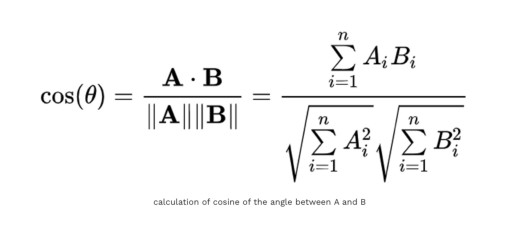

In [ ]:
from PIL import Image # PIL (Python Imaging Library) is used for opening, manipulating, and saving many different image file formats.
import matplotlib.pyplot as plt # matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.

img = Image.open("/content/Cosine_Similarity.png")
plt.imshow(img); plt.axis('off'); plt.show() # This code opens an image file named "Cosine_Similarity.png" and displays it using matplotlib, without showing the axes.


##Dynamic Pricing in Action
Have you noticed that flight tickets or hotel room rates change depending on demand?
That’s called Dynamic Pricing, prices go up when demand is high and drop when demand is low.

In [ ]:
demand = 800  # units sold
base_price = 100

if demand > 100:
    price = base_price * 1.2
elif demand < 50:
    price = base_price * 0.9
else:
    price = base_price

print(f"New price: ₹{price}")


New price: ₹120.0
